In [1]:
import json
import pandas as pd
import datetime
import os

base_path = r'C:\Users\97254\Downloads\data\ReliveData\export data\\'

def safe_convert_to_datetime(seconds):
    try:
        # Ensure that the seconds and nanoseconds are within valid ranges
        if not isinstance(seconds, (int, float)):
            raise ValueError(f"Invalid types for timestamp values: seconds={seconds}")
        if seconds < 0:
            raise ValueError(f"Invalid timestamp values: seconds={seconds}")
        return datetime.datetime.utcfromtimestamp(seconds)
    except (OSError, ValueError) as e:
        print(f"Error converting timestamp: {e}")
        return None

# Create a list to hold main data
main_data_list = []
# Extract and normalize nested fields into separate DataFrames
diet_plan_list = []
measures_list = []
meals_list = []

# Read the JSON file
allfiles = os.listdir(base_path)
for filename in allfiles:
    if 'food' in filename:
        continue
    with open(base_path+filename, 'r', encoding='utf-8') as file:
        data_list = json.load(file)


        # Loop through each entry in the list
        for data in data_list:
            # Convert the nested 'JoinDate' and 'BirthDate' fields into standard datetime format
            join_date = safe_convert_to_datetime(abs(data['JoinDate']['seconds']))
            birth_date = safe_convert_to_datetime(abs(data['BirthDate']['seconds']))

            # Create a dictionary for the main data
            main_data = {
                'Weight': data['Weight'],
                'FirstName': data['FirstName'],
                'IdCard': data['IdCard'],
                'Height': data['Height'],
                'Athlete': data['Athlete'],
                'Gender': data['Gender'],
#                 'AllowOnline': data['AllowOnline'],
                'Email': data['Email'],
                'LastName': data['LastName'],
                'JoinDate': join_date,
                'Phone': data['Phone'],
                'customerId': data['id'],
                'BirthDate': birth_date,
                'PicUrl': data['PicUrl'],
            }
            main_data_list.append(main_data)
            if 'DIET_PLAN' in data:
                for plan in data['DIET_PLAN']:
                    plan['date'] = safe_convert_to_datetime(abs(plan['date']['seconds']))
                    diet_plan_list.append(plan)
                    if 'meals' in plan:
                        for meal in plan['meals']:
                            meal['diet_plan_id'] = plan['id']
                            if 'hourFrom2' in meal and isinstance(meal['hourFrom2'], dict):
                                meal['hourFrom2'] = safe_convert_to_datetime(abs(meal['hourFrom2']['seconds']))
                            meals_list.append(meal)
            if 'MEASURES' in data:
                for measure in data['MEASURES']:
                    measure['customerId'] = data['id']
                    measure['date'] = safe_convert_to_datetime(abs(measure['date']['seconds']))
                    measures_list.append(measure)

# Convert the list of dictionaries into a DataFrame
main_df = pd.DataFrame(main_data_list)

diet_plan_df = pd.DataFrame(diet_plan_list)
measures_df = pd.DataFrame(measures_list)
meals_df = pd.DataFrame(meals_list)

# Display the dataframes
diet_plan_df = pd.DataFrame(diet_plan_list)
measures_df = pd.DataFrame(measures_list)
meals_df = pd.DataFrame(meals_list)

# Display the dataframes using pandas methods
print("Main Data:")
print(main_df)
print("\nDiet Plan:")
print(diet_plan_df)
print("\nMeasures:")
print(measures_df)
print("\nMeals:")
print(meals_df)

Main Data:
      Weight FirstName     IdCard  Height  Athlete  Gender Email    LastName  \
0        0.0       עבד  035708957     0.0    False    MALE             מרעי    
1        0.0      זינה  331115329     0.0    False  FEMALE              מרעי   
2        NaN      גואן  325708584     NaN    False  FEMALE          חג יחיא    
3        NaN   אבראהים  209413962     NaN    False    MALE             דאהוד   
4        NaN      רסמי  205792401   160.0    False    MALE            חסאדיה   
...      ...       ...        ...     ...      ...     ...   ...         ...   
3214    68.0     אחמד   336787213   152.0    False    MALE             סלאמי   
3215     0.0      סארי  328105176   180.0    False    MALE              עמאש   
3216     0.0      חנאן  333105583   174.0    False  FEMALE            גוהגאה   
3217     0.0      עבד   314631466   170.0    False    MALE          חג יחיא    
3218     0.0     דאליה  207551615   165.0    False  FEMALE        עבד אלחפיד   

                JoinDate    

In [2]:
# Joining main_df and measures_df on the 'customerid' column
result_df = pd.merge(main_df, measures_df, on='customerId', how='inner')

# Display the resulting DataFrame
print(type(result_df))


<class 'pandas.core.frame.DataFrame'>


In [3]:
result_df.head()

,Weight,FirstName,IdCard,Height,Athlete,Gender,Email,LastName,JoinDate,Phone,...,bmr,bmi,thighCirc,overallWeight,fatPercentage,bones,muscles,id,chestCirc,empty
0,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,2066.0,34.0,0.0,95.5,26.7,3.5,67.0,XunHNMm0hL37IB7tq34B,NaN,NaN
1,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,2048.0,32.0,0.0,91.8,25.2,3.4,66.3,pA2iSL5R2LdFQbx7IPzE,NaN,NaN
2,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,1817.0,31.0,0.0,91.0,23.0,3.4,66.0,w8OGgPj5LAZ3pKCAPKoc,NaN,NaN
3,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,2089.0,32.0,0.0,92.3,22.9,3.5,68.0,MjBh2zCHDbRJHoDMEGnl,NaN,NaN
4,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,2068.0,30.1,0.0,90.6,21.8,3.5,67.0,TSRxJZ5iW0G8KKZt3KX1,NaN,NaN


In [4]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame and 'BirthDate' is the column with birth dates in datetime format
# Function to calculate age
def calculate_age(birth_date):
    today = datetime.now()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Apply the function to the BirthDate column
result_df['Age'] = result_df['BirthDate'].apply(calculate_age)

# Display the updated DataFrame with the new 'Age' column
result_df


,Weight,FirstName,IdCard,Height,Athlete,Gender,Email,LastName,JoinDate,Phone,...,bmi,thighCirc,overallWeight,fatPercentage,bones,muscles,id,chestCirc,empty,Age
0,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,34.0,0.0,95.5,26.7,3.5,67.0,XunHNMm0hL37IB7tq34B,NaN,NaN,45
1,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,32.0,0.0,91.8,25.2,3.4,66.3,pA2iSL5R2LdFQbx7IPzE,NaN,NaN,45
2,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,31.0,0.0,91.0,23.0,3.4,66.0,w8OGgPj5LAZ3pKCAPKoc,NaN,NaN,45
3,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,32.0,0.0,92.3,22.9,3.5,68.0,MjBh2zCHDbRJHoDMEGnl,NaN,NaN,45
4,0.0,עבד,035708957,0.0,False,MALE,,מרעי,2023-03-31 11:39:39,0509111564,...,30.1,0.0,90.6,21.8,3.5,67.0,TSRxJZ5iW0G8KKZt3KX1,NaN,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22812,0.0,דאליה,207551615,165.0,False,FEMALE,,עבד אלחפיד,2023-03-31 12:34:05,0523043170,...,28.6,0.0,83.0,33.3,2.8,52.0,C7GAmjfsy3VWQytWYCvP,0.0,NaN,22
22813,0.0,דאליה,207551615,165.0,False,FEMALE,,עבד אלחפיד,2023-03-31 12:34:05,0523043170,...,29.8,71.0,84.8,35.0,2.7,52.0,UnFcP9fat1SniJYpzRMD,0.0,NaN,22
22814,0.0,דאליה,207551615,165.0,False,FEMALE,,עבד אלחפיד,2023-03-31 12:34:05,0523043170,...,29.0,70.0,83.8,33.6,2.8,52.0,eWN9XwMZo8bSsBTbj7Yp,0.0,NaN,22
22815,0.0,דאליה,207551615,165.0,False,FEMALE,,עבד אלחפיד,2023-03-31 12:34:05,0523043170,...,29.1,0.0,84.7,34.0,2.8,52.0,9COI0yaJONq8DUoGgBkj,0.0,NaN,22


In [5]:
# Replace all NaN values with 0
result_df.fillna(0, inplace=True)

# Alternatively, you can do this without modifying the original DataFrame:
# df = df.fillna(0)

# Display the DataFrame to verify the changes
# print(result_df)
test_dfffff = result_df.copy()

In [6]:
result_df.dtypes

Weight                       float64
FirstName                     object
IdCard                        object
Height                       float64
Athlete                         bool
Gender                        object
Email                         object
LastName                      object
JoinDate              datetime64[ns]
Phone                         object
customerId                    object
BirthDate             datetime64[ns]
PicUrl                        object
liquids                      float64
date                  datetime64[ns]
bellyFatPercentage           float64
hipsCirc                     float64
handCirc                     float64
bmr                          float64
bmi                          float64
thighCirc                    float64
overallWeight                float64
fatPercentage                float64
bones                        float64
muscles                      float64
id                            object
chestCirc                    float64
e

In [7]:
result_df.drop(['Weight','IdCard','FirstName','Email','LastName','Phone','empty','PicUrl','JoinDate','BirthDate'], axis=1, inplace=True)
print(result_df)

       Height  Athlete  Gender            customerId  liquids  \
0         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     55.0   
1         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     56.0   
2         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     51.0   
3         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     58.0   
4         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     57.0   
...       ...      ...     ...                   ...      ...   
22812   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     48.0   
22813   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     46.0   
22814   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     48.0   
22815   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     47.2   
22816   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     46.0   

                     date  bellyFatPercentage  hipsCirc  handCirc     bmr  \
0     2023-03-31 11:42:13                13.5     119.0       0.0  2066.0   
1     2023-04-09 15:06:15                12.5     114.0       0.0

In [8]:
meal_measure_df = pd.merge(result_df, diet_plan_df, on='customerId', how='inner')
meal_measure_df

,Height,Athlete,Gender,customerId,liquids,date_x,bellyFatPercentage,hipsCirc,handCirc,bmr,...,totalFats,date_y,notes,totalProteins,totalCarbs,totalSugar,meals,name,totalCalories,online
0,0.0,False,MALE,CasEZwCU3wpQZlAYzMuQ,55.0,2023-03-31 11:42:13,13.5,119.0,0.0,2066.0,...,44.0,2023-05-11 15:07:33,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,98.0,114.0,24.0,"[{'hourFrom': 7, 'items': [{'changedCalories':...",DEFAULT_DIET_PLAN,1578.0,NaN
1,0.0,False,MALE,CasEZwCU3wpQZlAYzMuQ,56.0,2023-04-09 15:06:15,12.5,114.0,0.0,2048.0,...,44.0,2023-05-11 15:07:33,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,98.0,114.0,24.0,"[{'hourFrom': 7, 'items': [{'changedCalories':...",DEFAULT_DIET_PLAN,1578.0,NaN
2,0.0,False,MALE,CasEZwCU3wpQZlAYzMuQ,51.0,2023-04-14 15:09:54,11.5,111.5,0.0,1817.0,...,44.0,2023-05-11 15:07:33,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,98.0,114.0,24.0,"[{'hourFrom': 7, 'items': [{'changedCalories':...",DEFAULT_DIET_PLAN,1578.0,NaN
3,0.0,False,MALE,CasEZwCU3wpQZlAYzMuQ,58.0,2023-05-05 15:49:48,11.0,0.0,0.0,2089.0,...,44.0,2023-05-11 15:07:33,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,98.0,114.0,24.0,"[{'hourFrom': 7, 'items': [{'changedCalories':...",DEFAULT_DIET_PLAN,1578.0,NaN
4,0.0,False,MALE,CasEZwCU3wpQZlAYzMuQ,57.0,2023-05-11 15:04:01,11.0,0.0,0.0,2068.0,...,44.0,2023-05-11 15:07:33,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,98.0,114.0,24.0,"[{'hourFrom': 7, 'items': [{'changedCalories':...",DEFAULT_DIET_PLAN,1578.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22365,165.0,False,FEMALE,QzJrfETp0gGiQk3EbSpo,48.0,2023-06-17 10:09:31,4.0,0.0,0.0,1727.0,...,34.0,2023-10-17 08:36:26,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,116.0,142.0,1.0,"[{'name': 'Breakfast', 'hourFrom': 7, 'display...",DEFAULT_DIET_PLAN,1247.0,False
22366,165.0,False,FEMALE,QzJrfETp0gGiQk3EbSpo,46.0,2023-07-08 10:01:28,4.5,97.0,30.0,1696.0,...,34.0,2023-10-17 08:36:26,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,116.0,142.0,1.0,"[{'name': 'Breakfast', 'hourFrom': 7, 'display...",DEFAULT_DIET_PLAN,1247.0,False
22367,165.0,False,FEMALE,QzJrfETp0gGiQk3EbSpo,48.0,2023-07-22 10:58:37,4.0,94.0,29.0,1718.0,...,34.0,2023-10-17 08:36:26,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,116.0,142.0,1.0,"[{'name': 'Breakfast', 'hourFrom': 7, 'display...",DEFAULT_DIET_PLAN,1247.0,False
22368,165.0,False,FEMALE,QzJrfETp0gGiQk3EbSpo,47.2,2023-09-02 10:16:24,4.0,0.0,0.0,1721.0,...,34.0,2023-10-17 08:36:26,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,116.0,142.0,1.0,"[{'name': 'Breakfast', 'hourFrom': 7, 'display...",DEFAULT_DIET_PLAN,1247.0,False


In [9]:
meal_measure_df.describe()

,Height,liquids,bellyFatPercentage,hipsCirc,handCirc,bmr,bmi,thighCirc,overallWeight,fatPercentage,bones,muscles,chestCirc,Age,totalFats,totalProteins,totalCarbs,totalSugar,totalCalories
count,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,22370.000000,12255.000000,22370.000000
mean,148.158274,48.723552,6.921695,52.975051,11.065794,1687.686191,30.442538,20.783071,82.292656,30.406262,4.218487,55.216055,2.469280,28.632857,48.998376,95.030313,163.282521,17.674500,1305.860751
std,49.299635,23.208441,23.895569,51.333069,20.777458,539.133701,48.330411,32.686997,24.674889,11.128406,44.970891,75.286370,16.026439,12.417527,25.518430,22.342639,50.556473,16.696703,267.577569
min,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,45.000000,3.000000,0.000000,0.000000,1451.000000,25.000000,0.000000,69.000000,25.000000,2.400000,44.300000,0.000000,18.000000,38.000000,91.000000,135.000000,3.000000,1139.000000
50%,163.000000,48.300000,6.000000,76.000000,0.000000,1623.000000,28.700000,0.000000,80.800000,31.000000,2.600000,49.500000,0.000000,27.000000,56.000000,91.000000,182.000000,13.000000,1402.000000
75%,170.000000,53.000000,9.000000,100.000000,27.000000,1894.750000,33.000000,58.000000,94.800000,36.475000,3.100000,58.800000,0.000000,38.000000,56.000000,97.000000,182.000000,31.000000,1402.000000
max,193.000000,1980.000000,2379.000000,1116.500000,635.000000,23477.000000,2400.000000,148.000000,1237.000000,415.000000,2367.000000,2800.000000,142.000000,54.000000,856.000000,459.300000,1351.000000,112.000000,4178.000000


In [10]:
print(meal_measure_df.dtypes)

Height                       float64
Athlete                         bool
Gender                        object
customerId                    object
liquids                      float64
date_x                datetime64[ns]
bellyFatPercentage           float64
hipsCirc                     float64
handCirc                     float64
bmr                          float64
bmi                          float64
thighCirc                    float64
overallWeight                float64
fatPercentage                float64
bones                        float64
muscles                      float64
id_x                          object
chestCirc                    float64
Age                            int64
id_y                          object
totalFats                    float64
date_y                datetime64[ns]
notes                         object
totalProteins                float64
totalCarbs                   float64
totalSugar                   float64
meals                         object
n

In [11]:
meal_measure_df.drop(['online','name','totalSugar','totalCarbs','totalProteins','totalFats','chestCirc','thighCirc','handCirc','hipsCirc'], axis=1, inplace=True)
print(meal_measure_df)

       Height  Athlete  Gender            customerId  liquids  \
0         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     55.0   
1         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     56.0   
2         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     51.0   
3         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     58.0   
4         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     57.0   
...       ...      ...     ...                   ...      ...   
22365   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     48.0   
22366   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     46.0   
22367   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     48.0   
22368   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     47.2   
22369   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     46.0   

                   date_x  bellyFatPercentage     bmr   bmi  overallWeight  \
0     2023-03-31 11:42:13                13.5  2066.0  34.0           95.5   
1     2023-04-09 15:06:15                12.5  2048.0  32.0    

In [12]:
male_df = meal_measure_df[meal_measure_df['Gender'] == 'MALE']
female_df = meal_measure_df[meal_measure_df['Gender'] == 'FEMALE']

In [13]:
def get_last_two_dates(group):
    return group.nlargest(2, 'date_x')

# Group by 'id' and apply the function
last_two_dates_df_male = male_df.groupby('customerId').apply(get_last_two_dates).reset_index(drop=True)
last_two_dates_df_female = female_df.groupby('customerId').apply(get_last_two_dates).reset_index(drop=True)

In [14]:
last_two_dates_df_male

,Height,Athlete,Gender,customerId,liquids,date_x,bellyFatPercentage,bmr,bmi,overallWeight,fatPercentage,bones,muscles,id_x,Age,id_y,date_y,notes,meals,totalCalories
0,167.0,False,MALE,05jwPVhKndcIMBy9PViX,51.1,2023-12-12 09:19:54,10.5,1968.0,30.0,89.5,28.0,3.3,62.2,D4AISGDijcm38RtF0Qfg,28,x740hw6kWv8LAF2RzJ5t,2023-12-12 09:22:05,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-3 שעו...,"[{'items': [{'changedSugar': False, 'sodium': ...",1275.0
1,167.0,False,MALE,05jwPVhKndcIMBy9PViX,50.0,2023-08-22 07:40:21,11.0,1907.0,33.0,90.0,30.0,3.2,60.0,2FfQ5uw5OKpVyRl5ntk2,28,x740hw6kWv8LAF2RzJ5t,2023-12-12 09:22:05,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-3 שעו...,"[{'items': [{'changedSugar': False, 'sodium': ...",1275.0
2,179.0,False,MALE,070veEVNrVZOvbcRcVb0,0.0,2021-09-22 21:00:00,13.0,2800.0,41.0,135.0,27.0,4.4,86.0,pvfLmroAdPgxAe7CcsYl,17,fzMKzCJqqATCdX7oQetG,2023-03-30 04:48:53,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'changedCalories': True, 'changed...",1402.0
3,179.0,False,MALE,070veEVNrVZOvbcRcVb0,47.0,2021-09-15 21:00:00,13.0,2800.0,41.0,132.0,28.0,4.3,84.0,EgAJcBxq7293XLuJGDL9,17,fzMKzCJqqATCdX7oQetG,2023-03-30 04:48:53,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'changedCalories': True, 'changed...",1402.0
4,163.0,False,MALE,0CTZxBN0kmmPtyM19Azd,51.0,2021-08-03 21:00:00,12.0,1700.0,30.0,80.0,28.0,2.9,54.0,X4g3QCfparAP1uf7uMba,41,amUUhMp2U09wDS8Nw211,2023-03-30 04:44:52,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'name': 'Breakfast', 'items': [{'protein': 1...",1402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,170.0,False,MALE,znI3XO87XrnjbP4CY12q,55.6,2024-05-25 14:44:24,8.5,2145.0,31.0,93.8,22.6,3.6,68.5,rdvjjnPAFydXOHye3qLp,30,cryNdnQobseU8GvX6Ral,2024-06-08 09:22:25,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-3 שעו...,"[{'items': [{'sodium': 0, 'options': [{'fats':...",1175.0
1583,170.0,True,MALE,zqGVQ17NLVQo3V1IOLej,45.6,2021-12-11 22:00:00,7.0,1658.0,27.5,80.0,19.1,2.8,52.0,m2HEtcUCGReWg403sIeN,32,RdGde39LgGYDRjMzcD4l,2023-03-30 05:25:12,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'carbs': 1, 'options': [{'protein...",1402.0
1584,170.0,True,MALE,zqGVQ17NLVQo3V1IOLej,56.0,2021-08-19 21:00:00,7.0,1900.0,28.0,81.1,19.0,3.2,62.0,0mU6Ezr835kLyIR75ua6,32,RdGde39LgGYDRjMzcD4l,2023-03-30 05:25:12,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'carbs': 1, 'options': [{'protein...",1402.0
1585,168.0,False,MALE,zrzrc8aKU4pHGIzkF3IS,45.6,2024-07-13 14:28:31,18.0,2718.0,45.0,133.6,36.0,4.2,81.0,21mG79Zpvh0B0fS4TCJ9,14,CM8sVRioyIVUgUDLGgE3,2024-07-13 14:33:26,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'changedCalories': True, 'protein...",1478.0


In [15]:
print(meal_measure_df.dtypes)

Height                       float64
Athlete                         bool
Gender                        object
customerId                    object
liquids                      float64
date_x                datetime64[ns]
bellyFatPercentage           float64
bmr                          float64
bmi                          float64
overallWeight                float64
fatPercentage                float64
bones                        float64
muscles                      float64
id_x                          object
Age                            int64
id_y                          object
date_y                datetime64[ns]
notes                         object
meals                         object
totalCalories                float64
dtype: object


In [16]:
# Example for checking negative values in 'Height' and 'overallWeight'
print("Negative heights:", meal_measure_df[meal_measure_df['Height'] < 0])
print("Negative weights:", meal_measure_df[meal_measure_df['overallWeight'] < 0])

Negative heights: Empty DataFrame
Columns: [Height, Athlete, Gender, customerId, liquids, date_x, bellyFatPercentage, bmr, bmi, overallWeight, fatPercentage, bones, muscles, id_x, Age, id_y, date_y, notes, meals, totalCalories]
Index: []
Negative weights: Empty DataFrame
Columns: [Height, Athlete, Gender, customerId, liquids, date_x, bellyFatPercentage, bmr, bmi, overallWeight, fatPercentage, bones, muscles, id_x, Age, id_y, date_y, notes, meals, totalCalories]
Index: []


In [17]:
# Checking for ages outside a reasonable range
print("Unusual Ages:", meal_measure_df[(meal_measure_df['Age'] > 120) | (meal_measure_df['Age'] < 0)])

# Check for incorrect date types
print("Invalid Dates:", meal_measure_df[pd.to_datetime(meal_measure_df['date_x'], errors='coerce').isna()])


Unusual Ages: Empty DataFrame
Columns: [Height, Athlete, Gender, customerId, liquids, date_x, bellyFatPercentage, bmr, bmi, overallWeight, fatPercentage, bones, muscles, id_x, Age, id_y, date_y, notes, meals, totalCalories]
Index: []
Invalid Dates: Empty DataFrame
Columns: [Height, Athlete, Gender, customerId, liquids, date_x, bellyFatPercentage, bmr, bmi, overallWeight, fatPercentage, bones, muscles, id_x, Age, id_y, date_y, notes, meals, totalCalories]
Index: []


In [18]:
# Check for unique values in the 'Gender' column
print("Unique Genders:", meal_measure_df['Gender'].unique())


Unique Genders: ['MALE' 'FEMALE']


<AxesSubplot:xlabel='bmi'>

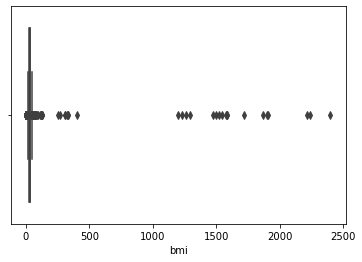

In [19]:
import seaborn as sns

# Boxplot to check for outliers in a specific column, e.g., 'bmi'
sns.boxplot(x=meal_measure_df['bmi'])


In [20]:
print("Unusual bmi:", len(meal_measure_df[(meal_measure_df['bmi'] > 100)]))

Unusual bmi: 33


In [21]:
# Assuming df is your DataFrame and 'bmi' is the column with BMI values
# Filter the DataFrame to exclude rows where BMI is over 100
filtered_df = meal_measure_df[meal_measure_df['bmi'] <= 100]

# Now, filtered_df contains only the rows where BMI is 100 or less
print(filtered_df)


       Height  Athlete  Gender            customerId  liquids  \
0         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     55.0   
1         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     56.0   
2         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     51.0   
3         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     58.0   
4         0.0    False    MALE  CasEZwCU3wpQZlAYzMuQ     57.0   
...       ...      ...     ...                   ...      ...   
22365   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     48.0   
22366   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     46.0   
22367   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     48.0   
22368   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     47.2   
22369   165.0    False  FEMALE  QzJrfETp0gGiQk3EbSpo     46.0   

                   date_x  bellyFatPercentage     bmr   bmi  overallWeight  \
0     2023-03-31 11:42:13                13.5  2066.0  34.0           95.5   
1     2023-04-09 15:06:15                12.5  2048.0  32.0    

In [22]:
#### WE WORK ON FITERED FATAFRAME

Unusual bmr: 344


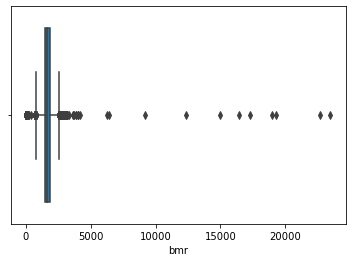

In [23]:
import seaborn as sns

# Boxplot to check for outliers in a specific column, e.g., 'bmi'
sns.boxplot(x=meal_measure_df['bmr'])
print("Unusual bmr:", len(meal_measure_df[(meal_measure_df['bmr'] <= 500)]))

In [24]:
new_filtered_df = filtered_df[(filtered_df['bmr'] <= 4000) & (filtered_df['bmr'] >= 500)]

# Now, filtered_df contains only the rows where BMI is 100 or less
print(new_filtered_df.shape)


(21982, 20)


Unusual Height: 18


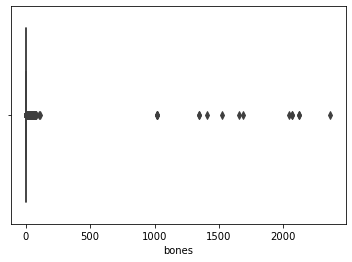

In [25]:
sns.boxplot(x=meal_measure_df['bones'])
print("Unusual Height:", len(meal_measure_df[(meal_measure_df['bones'] >= 100)]))

In [26]:
filter1_df = new_filtered_df[new_filtered_df['bones']<100]
print(filter1_df.shape)

(21965, 20)


Unusual Height: 19


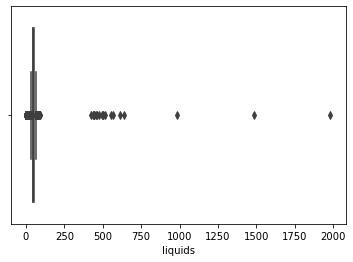

In [27]:
sns.boxplot(x=meal_measure_df['liquids'])
print("Unusual Height:", len(meal_measure_df[(meal_measure_df['liquids'] > 100)]))

In [28]:
filter2_df = filter1_df[filter1_df['muscles']<500]
print(filter2_df.shape)

(21915, 20)


In [29]:
filter3_df = filter2_df[filter2_df['liquids']<500]
print(filter3_df.shape)

(21907, 20)


In [30]:
filter3_df.dtypes

Height                       float64
Athlete                         bool
Gender                        object
customerId                    object
liquids                      float64
date_x                datetime64[ns]
bellyFatPercentage           float64
bmr                          float64
bmi                          float64
overallWeight                float64
fatPercentage                float64
bones                        float64
muscles                      float64
id_x                          object
Age                            int64
id_y                          object
date_y                datetime64[ns]
notes                         object
meals                         object
totalCalories                float64
dtype: object

In [31]:
filter3_df.rename(columns={
    'id_y': 'diet_plan_id',
    'id_x': 'measures_id'
}, inplace=True)

C:\Users\97254\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
import pandas as pd

# Assuming df is your original DataFrame
# Create four DataFrames based on the conditions

# Athlete Male
athlete_male_df = filter3_df[(filter3_df['Athlete'] == True) & (filter3_df['Gender'] == 'MALE')]

# Non-Athlete Male
non_athlete_male_df = filter3_df[(filter3_df['Athlete'] == False) & (filter3_df['Gender'] == 'MALE')]

# Athlete Female
athlete_female_df = filter3_df[(filter3_df['Athlete'] == True) & (filter3_df['Gender'] == 'FEMALE')]

# Non-Athlete Female
non_athlete_female_df = filter3_df[(filter3_df['Athlete'] == False) & (filter3_df['Gender'] == 'FEMALE')]


                      Height   liquids  bellyFatPercentage       bmr  \
Height              1.000000 -0.034363            0.026950  0.203057   
liquids            -0.034363  1.000000           -0.034233 -0.035501   
bellyFatPercentage  0.026950 -0.034233            1.000000  0.116055   
bmr                 0.203057 -0.035501            0.116055  1.000000   
bmi                 0.088807 -0.257196            0.143514  0.554694   
overallWeight       0.194286 -0.194828            0.119308  0.763861   
fatPercentage       0.035820 -0.324947            0.054521 -0.021519   
bones               0.031452 -0.000462            0.020142  0.162001   
muscles             0.171268  0.084811            0.096097  0.793839   
Age                 0.228739 -0.105899            0.073310  0.180855   
totalCalories       0.037069  0.084307            0.028968  0.303485   

                         bmi  overallWeight  fatPercentage     bones  \
Height              0.088807       0.194286       0.035820  0.0

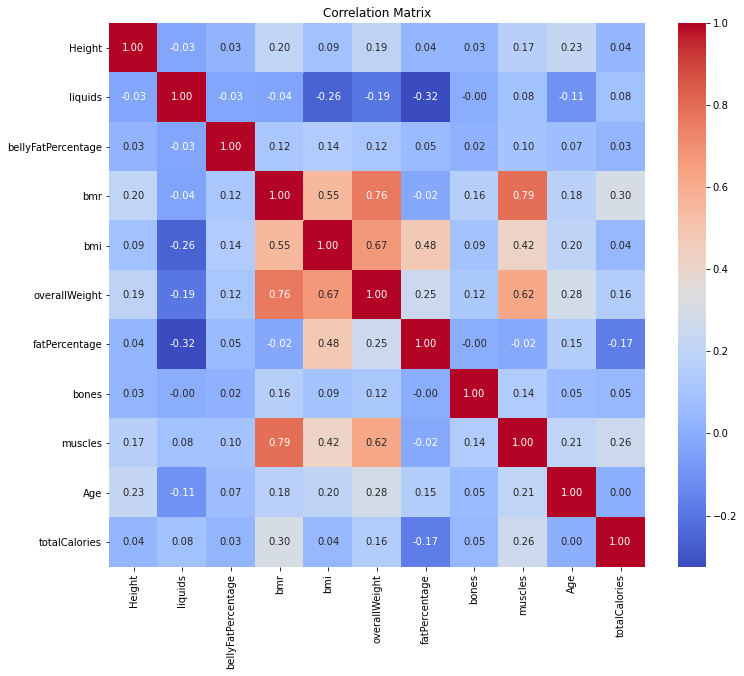

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select only the numerical columns for the correlation matrix
numerical_df = filter3_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [34]:
import pandas as pd
import numpy as np

# Assuming athlete_female_df is your DataFrame
df = athlete_female_df.copy()

# Fill missing values if necessary
df.fillna(method='ffill', inplace=True)

# first try based on the correlation: 

### building the system recommendation new features

In [35]:
import pandas as pd

# Sample diet plan recommendations for each category
diet_plan_recommendations = {
    ('underweight', 'low', 'Male', 'Athlete'): 'DP1',
    ('underweight', 'medium', 'Male', 'Athlete'): 'DP2',
    ('underweight', 'high', 'Male', 'Athlete'): 'DP3',
    ('healthy', 'low', 'Male', 'Athlete'): 'DP4',
    ('healthy', 'medium', 'Male', 'Athlete'): 'DP5',
    ('healthy', 'high', 'Male', 'Athlete'): 'DP6',
    ('overweight', 'low', 'Male', 'Athlete'): 'DP7',
    ('overweight', 'medium', 'Male', 'Athlete'): 'DP8',
    ('overweight', 'high', 'Male', 'Athlete'): 'DP9',
    ('obese', 'low', 'Male', 'Athlete'): 'DP10',
    ('obese', 'medium', 'Male', 'Athlete'): 'DP11',
    ('obese', 'high', 'Male', 'Athlete'): 'DP12',
    ('underweight', 'low', 'Female', 'Athlete'): 'DP13',
    ('underweight', 'medium', 'Female', 'Athlete'): 'DP14',
    ('underweight', 'high', 'Female', 'Athlete'): 'DP15',
    ('healthy', 'low', 'Female', 'Athlete'): 'DP16',
    ('healthy', 'medium', 'Female', 'Athlete'): 'DP17',
    ('healthy', 'high', 'Female', 'Athlete'): 'DP18',
    ('overweight', 'low', 'Female', 'Athlete'): 'DP19',
    ('overweight', 'medium', 'Female', 'Athlete'): 'DP20',
    ('overweight', 'high', 'Female', 'Athlete'): 'DP21',
    ('obese', 'low', 'Female', 'Athlete'): 'DP22',
    ('obese', 'medium', 'Female', 'Athlete'): 'DP23',
    ('obese', 'high', 'Female', 'Athlete'): 'DP24',
    ('underweight', 'low', 'Male', 'Non-Athlete'): 'DP25',
    ('underweight', 'medium', 'Male', 'Non-Athlete'): 'DP26',
    ('underweight', 'high', 'Male', 'Non-Athlete'): 'DP27',
    ('healthy', 'low', 'Male', 'Non-Athlete'): 'DP28',
    ('healthy', 'medium', 'Male', 'Non-Athlete'): 'DP29',
    ('healthy', 'high', 'Male', 'Non-Athlete'): 'DP30',
    ('overweight', 'low', 'Male', 'Non-Athlete'): 'DP31',
    ('overweight', 'medium', 'Male', 'Non-Athlete'): 'DP32',
    ('overweight', 'high', 'Male', 'Non-Athlete'): 'DP33',
    ('obese', 'low', 'Male', 'Non-Athlete'): 'DP34',
    ('obese', 'medium', 'Male', 'Non-Athlete'): 'DP35',
    ('obese', 'high', 'Male', 'Non-Athlete'): 'DP36',
    ('underweight', 'low', 'Female', 'Non-Athlete'): 'DP37',
    ('underweight', 'medium', 'Female', 'Non-Athlete'): 'DP38',
    ('underweight', 'high', 'Female', 'Non-Athlete'): 'DP39',
    ('healthy', 'low', 'Female', 'Non-Athlete'): 'DP40',
    ('healthy', 'medium', 'Female', 'Non-Athlete'): 'DP41',
    ('healthy', 'high', 'Female', 'Non-Athlete'): 'DP42',
    ('overweight', 'low', 'Female', 'Non-Athlete'): 'DP43',
    ('overweight', 'medium', 'Female', 'Non-Athlete'): 'DP44',
    ('overweight', 'high', 'Female', 'Non-Athlete'): 'DP45',
    ('obese', 'low', 'Female', 'Non-Athlete'): 'DP46',
    ('obese', 'medium', 'Female', 'Non-Athlete'): 'DP47',
    ('obese', 'high', 'Female', 'Non-Athlete'): 'DP48',
}

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'healthy'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

# Function to categorize BMR
def categorize_bmr(bmr):
    if bmr < 1500:
        return 'low'
    elif 1500 <= bmr <= 2500:
        return 'medium'
    else:
        return 'high'
    
# Function to categorize gender
def categorize_gender(gender):
    if gender.lower() == 'male':
        return 'Male'
    elif gender.lower() == 'female':
        return 'Female'
    else:
        return 'Unknown'

# Function to categorize athlete
def categorize_athlete(athlete):
    if athlete:
        return 'Athlete'
    else:
        return 'Non-Athlete'
    
# Function to recommend a diet plan ID based on BMI, BMR, Gender, and Athlete status
def recommend_diet_plan(bmi, bmr, gender, athlete):
    bmi_category = categorize_bmi(bmi)
    bmr_category = categorize_bmr(bmr)
    gender_category = categorize_gender(gender)
    athlete_category = categorize_athlete(athlete)
    category = (bmi_category, bmr_category, gender_category, athlete_category)
    return diet_plan_recommendations.get(category, 'Default diet plan ID')

In [36]:
import pandas as pd

# Assuming athlete_female_df is your DataFrame
df = filter3_df.copy()

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'healthy'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

# Function to categorize BMR
def categorize_bmr(bmr):
    if bmr < 1500:
        return 'low'
    elif 1500 <= bmr <= 2500:
        return 'medium'
    else:
        return 'high'
    
# Function to categorize gender
def categorize_gender(gender):
    if gender.lower() == 'male':
        return 'Male'
    elif gender.lower() == 'female':
        return 'Female'
    else:
        return 'Unknown'

# Function to categorize athlete
def categorize_athlete(athlete):
    if athlete:
        return 'Athlete'
    else:
        return 'Non-Athlete'

# Create empty dictionary to store recommendations
diet_plan_recommendations = {}

# Iterate over the DataFrame and populate the dictionary
for _, row in df.iterrows():
    bmi_category = categorize_bmi(row['bmi'])
    bmr_category = categorize_bmr(row['bmr'])
    gender_category = categorize_gender(row['Gender'])
    athlete_category = categorize_athlete(row['Athlete'])
    
    category = (bmi_category, bmr_category, gender_category, athlete_category)
    
    # Assign diet plan ID from the row to the corresponding category in the dictionary
    diet_plan_recommendations[category] = row['diet_plan_id']

# Display the populated dictionary
print(diet_plan_recommendations)

{('obese', 'medium', 'Male', 'Non-Athlete'): 'nUZavMS30T9atO8tX9ru', ('overweight', 'low', 'Female', 'Non-Athlete'): 'PORywTCDrxem7O7kOnp8', ('healthy', 'low', 'Female', 'Non-Athlete'): 't46nNuKZ8aMkHfJGmmIS', ('obese', 'medium', 'Female', 'Non-Athlete'): 'o09wRKVvWWl6z4yogfUj', ('overweight', 'medium', 'Female', 'Non-Athlete'): 'o09wRKVvWWl6z4yogfUj', ('obese', 'low', 'Female', 'Non-Athlete'): 't65yiud3IbXlSTD1jHgd', ('healthy', 'medium', 'Male', 'Non-Athlete'): 'EFF4NaLpOFvINuVSBqAg', ('overweight', 'medium', 'Male', 'Non-Athlete'): 'nUZavMS30T9atO8tX9ru', ('obese', 'high', 'Male', 'Non-Athlete'): 'q2K2IzLfIV2jgtqS8Cm0', ('obese', 'medium', 'Female', 'Athlete'): 'BtfY6AchyOlPpWHgoSbW', ('overweight', 'medium', 'Female', 'Athlete'): 'BtfY6AchyOlPpWHgoSbW', ('healthy', 'medium', 'Male', 'Athlete'): 'AWjMAivFgDCIZn7oc44W', ('underweight', 'medium', 'Male', 'Athlete'): 'VBKHYZhAtuCsZ9XFWujE', ('overweight', 'medium', 'Male', 'Athlete'): '7Ye2kApzw8T4f633bmkx', ('underweight', 'low', 'Fem

In [37]:
import pandas as pd

# Assuming df is your DataFrame with all necessary columns

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'healthy'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

# Function to categorize BMR
def categorize_bmr(bmr):
    if bmr < 1500:
        return 'low'
    elif 1500 <= bmr <= 2500:
        return 'medium'
    else:
        return 'high'

# Function to categorize gender
def categorize_gender(gender):
    if gender.lower() == 'male':
        return 'Male'
    elif gender.lower() == 'female':
        return 'Female'
    else:
        return 'Unknown'

# Function to categorize athlete status
def categorize_athlete(athlete):
    if athlete:
        return 'Athlete'
    else:
        return 'Non-Athlete'

# Function to categorize body fat percentage
def categorize_body_fat(fat_percentage, gender):
    if gender.lower() == 'male':
        if fat_percentage < 6:
            return 'low fat'
        elif 6 <= fat_percentage <= 24:
            return 'normal fat'
        elif 25 <= fat_percentage <= 31:
            return 'high fat'
        else:
            return 'very high fat'
    elif gender.lower() == 'female':
        if fat_percentage < 16:
            return 'low fat'
        elif 16 <= fat_percentage <= 30:
            return 'normal fat'
        elif 31 <= fat_percentage <= 36:
            return 'high fat'
        else:
            return 'very high fat'
    else:
        return 'Unknown'

# Create an empty dictionary to store recommendations
diet_plan_recommendations = {}

# Iterate over the DataFrame and populate the dictionary with lists of unique plan IDs
for _, row in df.iterrows():
    bmi_category = categorize_bmi(row['bmi'])
    bmr_category = categorize_bmr(row['bmr'])
    gender_category = categorize_gender(row['Gender'])
    athlete_category = categorize_athlete(row['Athlete'])
    fat_category = categorize_body_fat(row['fatPercentage'], row['Gender'])
    
    category = (bmi_category, bmr_category, gender_category, athlete_category, fat_category)
    
    # Initialize the list for this key if it doesn't exist
    if category not in diet_plan_recommendations:
        diet_plan_recommendations[category] = []
    
    # Append the diet plan ID only if it's not already in the list
    if row['diet_plan_id'] not in diet_plan_recommendations[category]:
        diet_plan_recommendations[category].append(row['diet_plan_id'])

# Display the populated dictionary
for key, plans in diet_plan_recommendations.items():
    print(f"{key}: {plans}")


('obese', 'medium', 'Male', 'Non-Athlete', 'high fat'): ['YPlmXA28V6E2ocKfnd9V', 'mlR0FtbneJkesY0MXOEQ', 'dZVeIFb6b8FoZRO7ApCf', 'zc608EcMp8rrxnXfBb34', '2ADvdDH9f5CEZNXwNSHn', '17aRc1KtysMrNvVIBrjK', 'BNW4aQfdZtgkqLHhi6y8', 'FNUZJ9jHblNC9d6klm6N', 'O4NLFvvYFTrRCYT2Scc6', 'mCs5r5RhBvrUDxMMH9vq', 'ZVg8uJt55yOKJ2AMrFl6', 'ZWRNuhS2TD2ujBGQXuYz', 'GQfEhrMje6xxkAsM9VYR', '0vjBVkNV6K35MH53wC04', 'y4kJVEfczcMJl5eIyom3', 'NViIcKKqIcJUbg3zWv86', 'UTdgVNog2OFb6melsl6x', 'yeS1kBsMxs8ro6PAb0gb', 'TqpfDOaL8uuoDhMAJJ0c', 'phBGXoRwnnyTtpnEfBF5', 'tnOPrAQJmUJU7jCx04Ne', 'Xu6r6jFPLTVhZJBqN9iu', 'ecJPVmUiFEZrBLFLFZNb', '7kEGR06rfxjYYmpHKRwV', '2b5gJozi1hW6oIVFpiKo', 'CqSYu3eX89sDwlzYiKZ1', 'utQx8AnY1ZeMmdAyyKF4', 'bWB5IdORySSpAmjeuzDq', '9TEhPxDMXQVXrgrmlZuW', 'YO7wlqCG7NQGih4VbJpA', 'oLnt2s1Szg9l9d5xm7l6', 'i9ZgnIick7melJZlINt0', 'N2adjBKG1WI25ve7g6J1', 'pN3olVxVxyoeQltTwmuJ', 'xhInbFOwgMPASd0ubjZG', 'IxZlPNDmZF12KAosRRaq', 'qRBXwvPW8B0m70CtxWCu', 'qQO3FxWzfYdf7NJFVE2K', 'YfjRTw5HsSKZsmvxyVOB', 'fGRqic

In [38]:
# Assuming diet_plan_recommendations is your dictionary
size_of_dict = len(diet_plan_recommendations)

print(f"The size of the diet_plan_recommendations dictionary is: {size_of_dict}")

The size of the diet_plan_recommendations dictionary is: 112


In [39]:
import pandas as pd

# Assuming df is your DataFrame with all necessary columns

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'healthy'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

# Function to categorize BMR
def categorize_bmr(bmr):
    if bmr < 1500:
        return 'low'
    elif 1500 <= bmr <= 2500:
        return 'medium'
    else:
        return 'high'
    
# Function to categorize gender
def categorize_gender(gender):
    if gender.lower() == 'male':
        return 'Male'
    elif gender.lower() == 'female':
        return 'Female'
    else:
        return 'Unknown'

# Function to categorize athlete status
def categorize_athlete(athlete):
    if athlete:
        return 'Athlete'
    else:
        return 'Non-Athlete'

# Create an empty dictionary to store recommendations
diet_plan_recommendations = {}

# Iterate over the DataFrame and populate the dictionary with lists of unique plan IDs
for _, row in df.iterrows():
    bmi_category = categorize_bmi(row['bmi'])
    bmr_category = categorize_bmr(row['bmr'])
    gender_category = categorize_gender(row['Gender'])
    athlete_category = categorize_athlete(row['Athlete'])
    
    category = (bmi_category, bmr_category, gender_category, athlete_category)
    
    # Initialize the list for this key if it doesn't exist
    if category not in diet_plan_recommendations:
        diet_plan_recommendations[category] = []
    
    # Append the diet plan ID only if it's not already in the list
    if row['diet_plan_id'] not in diet_plan_recommendations[category]:
        diet_plan_recommendations[category].append(row['diet_plan_id'])

# Display the populated dictionary
for key, plans in diet_plan_recommendations.items():
    print(f"{key}: {plans}")


('obese', 'medium', 'Male', 'Non-Athlete'): ['YPlmXA28V6E2ocKfnd9V', 'mlR0FtbneJkesY0MXOEQ', 'dZVeIFb6b8FoZRO7ApCf', 'zc608EcMp8rrxnXfBb34', '2ADvdDH9f5CEZNXwNSHn', '17aRc1KtysMrNvVIBrjK', 'BNW4aQfdZtgkqLHhi6y8', 'FNUZJ9jHblNC9d6klm6N', 'O4NLFvvYFTrRCYT2Scc6', 'mCs5r5RhBvrUDxMMH9vq', 'ZVg8uJt55yOKJ2AMrFl6', 'ZWRNuhS2TD2ujBGQXuYz', 'GQfEhrMje6xxkAsM9VYR', '0vjBVkNV6K35MH53wC04', 'y4kJVEfczcMJl5eIyom3', 'NViIcKKqIcJUbg3zWv86', 'UTdgVNog2OFb6melsl6x', 'yeS1kBsMxs8ro6PAb0gb', 'TqpfDOaL8uuoDhMAJJ0c', 'phBGXoRwnnyTtpnEfBF5', 'tnOPrAQJmUJU7jCx04Ne', 'Xu6r6jFPLTVhZJBqN9iu', 'ecJPVmUiFEZrBLFLFZNb', '7kEGR06rfxjYYmpHKRwV', '2b5gJozi1hW6oIVFpiKo', 'CqSYu3eX89sDwlzYiKZ1', 'utQx8AnY1ZeMmdAyyKF4', 'NC1p0m0h7PNo6aMf6uNg', 'bWB5IdORySSpAmjeuzDq', '9TEhPxDMXQVXrgrmlZuW', 'YO7wlqCG7NQGih4VbJpA', 'oLnt2s1Szg9l9d5xm7l6', 'i9ZgnIick7melJZlINt0', 'N2adjBKG1WI25ve7g6J1', 'pN3olVxVxyoeQltTwmuJ', 'hzzaASQ6IWEHLQyNaJor', 'q2LqTgWakkp7NPiTPnCO', 'VUWbDR3xAe1Zg3hwA2nQ', 'xhInbFOwgMPASd0ubjZG', 'MPWe9ruFxJoFVAlAN5

In [40]:
# Assuming diet_plan_recommendations is your dictionary

# Iterate through the dictionary and print the number of unique items for each key
for key, plans in diet_plan_recommendations.items():
    unique_count = len(plans)
    print(f"{key}: {unique_count} unique items")


('obese', 'medium', 'Male', 'Non-Athlete'): 439 unique items
('overweight', 'low', 'Female', 'Non-Athlete'): 565 unique items
('healthy', 'low', 'Female', 'Non-Athlete'): 459 unique items
('obese', 'medium', 'Female', 'Non-Athlete'): 879 unique items
('overweight', 'medium', 'Female', 'Non-Athlete'): 632 unique items
('obese', 'low', 'Female', 'Non-Athlete'): 210 unique items
('healthy', 'medium', 'Male', 'Non-Athlete'): 128 unique items
('overweight', 'medium', 'Male', 'Non-Athlete'): 331 unique items
('obese', 'high', 'Male', 'Non-Athlete'): 148 unique items
('obese', 'medium', 'Female', 'Athlete'): 49 unique items
('overweight', 'medium', 'Female', 'Athlete'): 35 unique items
('healthy', 'medium', 'Male', 'Athlete'): 21 unique items
('underweight', 'medium', 'Male', 'Athlete'): 3 unique items
('overweight', 'medium', 'Male', 'Athlete'): 32 unique items
('underweight', 'low', 'Female', 'Non-Athlete'): 69 unique items
('healthy', 'medium', 'Female', 'Non-Athlete'): 135 unique items
('

In [41]:
# Assuming diet_plan_recommendations is your dictionary

# Calculate the total number of unique items across all keys
total_unique_items = sum(len(plans) for plans in diet_plan_recommendations.values())

print(f"Total number of unique diet plan IDs: {total_unique_items}")


Total number of unique diet plan IDs: 4507


# here we can see an ovelap between some of categoiries, because we have arond 2190 meal plan

In [42]:
# Assuming diet_plan_recommendations is your dictionary
size_of_dict = len(diet_plan_recommendations)

print(f"The size of the diet_plan_recommendations dictionary is: {size_of_dict}")

The size of the diet_plan_recommendations dictionary is: 38


# working:

In [43]:
# Assuming diet_plan_recommendations is your dictionary
size_of_dict = len(diet_plan_recommendations)

print(f"The size of the diet_plan_recommendations dictionary is: {size_of_dict}")

The size of the diet_plan_recommendations dictionary is: 38


# this with age

In [44]:
import pandas as pd


# Function to categorize Age
def categorize_age(age):
    if age < 18:
        return 'Youth'
    elif 18 <= age <= 35:
        return 'Adult'
    elif 36 <= age <= 55:
        return 'Middle-Aged'
    else:
        return 'Senior'

# Create an empty dictionary to store recommendations
diet_plan_recommendations = {}

# Iterate over the DataFrame and populate the dictionary with lists of unique plan IDs
for _, row in df.iterrows():
    bmi_category = categorize_bmi(row['bmi'])
    bmr_category = categorize_bmr(row['bmr'])
    gender_category = categorize_gender(row['Gender'])
    athlete_category = categorize_athlete(row['Athlete'])
    fat_category = categorize_body_fat(row['fatPercentage'], row['Gender'])
    age_category = categorize_age(row['Age'])
    
    category = (bmi_category, bmr_category, gender_category, athlete_category, fat_category, age_category)
    
    # Initialize the list for this key if it doesn't exist
    if category not in diet_plan_recommendations:
        diet_plan_recommendations[category] = []
    
    # Append the diet plan ID only if it's not already in the list
    if row['diet_plan_id'] not in diet_plan_recommendations[category]:
        diet_plan_recommendations[category].append(row['diet_plan_id'])

# Display the populated dictionary
for key, plans in diet_plan_recommendations.items():
    print(f"{key}: {plans}")


('obese', 'medium', 'Male', 'Non-Athlete', 'high fat', 'Middle-Aged'): ['YPlmXA28V6E2ocKfnd9V', '2ADvdDH9f5CEZNXwNSHn', '17aRc1KtysMrNvVIBrjK', 'FNUZJ9jHblNC9d6klm6N', 'O4NLFvvYFTrRCYT2Scc6', 'y4kJVEfczcMJl5eIyom3', 'phBGXoRwnnyTtpnEfBF5', 'YO7wlqCG7NQGih4VbJpA', 'oLnt2s1Szg9l9d5xm7l6', 'N2adjBKG1WI25ve7g6J1', 'xhInbFOwgMPASd0ubjZG', 'IxZlPNDmZF12KAosRRaq', 'qRBXwvPW8B0m70CtxWCu', 'ONJFy0cWEGsaYIbqcFmu', 'BidHJtiTucKdGzCg4CZA', 'iYLcZhaVXW9jaiCzUrdY', 'tWA68rSyIL26elsJXq1e', 'kl3nsUnJpYO62lipeh9B', 'CZZonj9lF0I73oDtAylH', 't4DeY8snTAuP6ODIUD2z', 'VHQVOPdRsNYDZtcinRqA', 'ljm2j0Y8iJFy0lfTjJ7A', 'ZmrLX45Y09b0WVFfBj2U', 'azCjVHy3X8hpms109pTG', '8sWI5qSAz3sn7n5ZcsKZ', 'cegLornqR3foAooWffAA', 'TaNkdkupTFGLzxuhRykj', '3LIRyQ9PexeiMjCu9MMc', 'Z583c5prcpiXPFFfLVBE', 'OOOlQlqmx1qxLXzcLwHX', '2eT5kqE4zS33FcXOYY6x', 'elrVO9lw9XeQb4lI2tyG', 'MZVHtLwGg160J5mWYO1p', 'XHAekWEHGgEWFJLk8wcN', 'Rsn7rufbIiurXABMvIYd', 'TEffKWQyz5fDxKLMeBTr', 'bqVOBFTqz1qSZfFJZDXE', 'caAsXY22KW5IsF4PJFnY', 'KAapecnTE38i01w

In [45]:
# Assuming diet_plan_recommendations is your dictionary
size_of_dict = len(diet_plan_recommendations)

print(f"The size of the diet_plan_recommendations dictionary is: {size_of_dict}")
# Assuming diet_plan_recommendations is your dictionary

# Iterate through the dictionary and print the number of unique items for each key
for key, plans in diet_plan_recommendations.items():
    unique_count = len(plans)
    print(f"{key}: {unique_count} unique items")


The size of the diet_plan_recommendations dictionary is: 254
('obese', 'medium', 'Male', 'Non-Athlete', 'high fat', 'Middle-Aged'): 121 unique items
('obese', 'medium', 'Male', 'Non-Athlete', 'normal fat', 'Middle-Aged'): 77 unique items
('overweight', 'low', 'Female', 'Non-Athlete', 'normal fat', 'Youth'): 72 unique items
('healthy', 'low', 'Female', 'Non-Athlete', 'normal fat', 'Youth'): 129 unique items
('overweight', 'low', 'Female', 'Non-Athlete', 'very high fat', 'Youth'): 28 unique items
('obese', 'medium', 'Female', 'Non-Athlete', 'very high fat', 'Adult'): 434 unique items
('overweight', 'medium', 'Female', 'Non-Athlete', 'very high fat', 'Adult'): 149 unique items
('overweight', 'medium', 'Female', 'Non-Athlete', 'high fat', 'Adult'): 322 unique items
('obese', 'medium', 'Male', 'Non-Athlete', 'high fat', 'Adult'): 161 unique items
('overweight', 'low', 'Female', 'Non-Athlete', 'high fat', 'Adult'): 224 unique items
('healthy', 'low', 'Female', 'Non-Athlete', 'normal fat', 'A

# with muscles

In [46]:
import pandas as pd


# Function to categorize muscle weight based on gender
def categorize_muscle_weight(muscles, gender):
    if gender.lower() == 'male':
        if muscles < 40:
            return 'low muscle'
        elif 40 <= muscles <= 55:
            return 'average muscle'
        else:
            return 'high muscle'
    elif gender.lower() == 'female':
        if muscles < 30:
            return 'low muscle'
        elif 30 <= muscles <= 45:
            return 'average muscle'
        else:
            return 'high muscle'
    else:
        return 'Unknown'

# Create an empty dictionary to store recommendations
diet_plan_recommendations = {}

# Iterate over the DataFrame and populate the dictionary with lists of unique plan IDs
for _, row in df.iterrows():
    bmi_category = categorize_bmi(row['bmi'])
    bmr_category = categorize_bmr(row['bmr'])
    gender_category = categorize_gender(row['Gender'])
    athlete_category = categorize_athlete(row['Athlete'])
    fat_category = categorize_body_fat(row['fatPercentage'], row['Gender'])
    age_category = categorize_age(row['Age'])
    muscle_category = categorize_muscle_weight(row['muscles'], row['Gender'])
    
    category = (bmi_category, bmr_category, gender_category, athlete_category, fat_category, age_category, muscle_category)
    
    # Initialize the list for this key if it doesn't exist
    if category not in diet_plan_recommendations:
        diet_plan_recommendations[category] = []
    
    # Append the diet plan ID only if it's not already in the list
    if row['diet_plan_id'] not in diet_plan_recommendations[category]:
        diet_plan_recommendations[category].append(row['diet_plan_id'])


In [47]:
# Assuming diet_plan_recommendations is your dictionary
size_of_dict = len(diet_plan_recommendations)

print(f"The size of the diet_plan_recommendations dictionary is: {size_of_dict}")
# Assuming diet_plan_recommendations is your dictionary

# Iterate through the dictionary and print the number of unique items for each key
for key, plans in diet_plan_recommendations.items():
    unique_count = len(plans)
    print(f"{key}: {unique_count} unique items")


The size of the diet_plan_recommendations dictionary is: 430
('obese', 'medium', 'Male', 'Non-Athlete', 'high fat', 'Middle-Aged', 'high muscle'): 119 unique items
('obese', 'medium', 'Male', 'Non-Athlete', 'normal fat', 'Middle-Aged', 'high muscle'): 77 unique items
('overweight', 'low', 'Female', 'Non-Athlete', 'normal fat', 'Youth', 'average muscle'): 59 unique items
('healthy', 'low', 'Female', 'Non-Athlete', 'normal fat', 'Youth', 'average muscle'): 107 unique items
('overweight', 'low', 'Female', 'Non-Athlete', 'very high fat', 'Youth', 'average muscle'): 28 unique items
('obese', 'medium', 'Female', 'Non-Athlete', 'very high fat', 'Adult', 'high muscle'): 417 unique items
('obese', 'medium', 'Female', 'Non-Athlete', 'very high fat', 'Adult', 'low muscle'): 7 unique items
('overweight', 'medium', 'Female', 'Non-Athlete', 'very high fat', 'Adult', 'high muscle'): 140 unique items
('overweight', 'medium', 'Female', 'Non-Athlete', 'high fat', 'Adult', 'high muscle'): 309 unique item

# classify and getting a very low accurcy because of the overlap of the diet plans

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame with all necessary columns
df = athlete_female_df.copy()
# Function to categorize BMI, BMR, gender, athlete status, body fat, age, and muscle weight
def categorize_features(row):
    bmi_category = categorize_bmi(row['bmi'])
    bmr_category = categorize_bmr(row['bmr'])
    gender_category = categorize_gender(row['Gender'])
    athlete_category = categorize_athlete(row['Athlete'])
    fat_category = categorize_body_fat(row['fatPercentage'], row['Gender'])
    age_category = categorize_age(row['Age'])
#     muscle_category = categorize_muscle_weight(row['muscles'], row['Gender'])
    
    return (bmi_category, bmr_category, gender_category, athlete_category, fat_category, age_category)

# Apply the categorization function to the DataFrame to get the features
df['category'] = df.apply(categorize_features, axis=1)

# Extract the features (X) and the target variable (y)
X = pd.get_dummies(df['category'].apply(pd.Series))  # Convert categorical data into dummy/indicator variables
y = df['diet_plan_id']  # The target variable is the diet plan ID

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Ensure the labels parameter matches the classes used by the label encoder
labels = np.unique(y_train)  # Get the unique labels from the training set
target_names = label_encoder.inverse_transform(labels)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

# Function to classify new input features
def classify_diet_plan(input_features):
    input_df = pd.DataFrame([input_features])
    input_df = pd.get_dummies(input_df.apply(pd.Series))  # Ensure input features match training features
    input_df = input_df.reindex(columns=X.columns, fill_value=0)  # Align with training columns
    prediction = clf.predict(input_df)
    return label_encoder.inverse_transform(prediction)[0]

# Example usage of the classify_diet_plan function
example_features = categorize_features(df.iloc[0])  # Replace with actual input features
predicted_diet_plan = classify_diet_plan(example_features)
print(f'Predicted Diet Plan: {predicted_diet_plan}')


Accuracy: 0.3057324840764331
                      precision    recall  f1-score   support

0E4u6UnSdvS4bPgys0Mq       0.00      0.00      0.00         0
0Jrtu7wNI0eLxPldXDWX       1.00      1.00      1.00         1
12Ay5VekMNPE3elGAHze       0.00      0.00      0.00         2
1TodA7fHwg0KQw9ledAp       0.00      0.00      0.00         0
3vuhv4707G8mEiJEkzk8       0.00      0.00      0.00         0
4kPPbXHhHaw7YB6JbDel       0.00      0.00      0.00         0
4zkZSzwURNYUsWzpkHv8       0.00      0.00      0.00         4
5gImIsL8NuXoT9oIs3zO       0.00      0.00      0.00         3
8J3n0clix3VAfipC1vBL       0.33      0.50      0.40         2
8Q9M5lDlXc2gZhu6fVcp       0.12      1.00      0.22         3
8kYp9PDK80h1i3yuOZnn       0.00      0.00      0.00         4
8oZaXRD4e03anra0evZF       0.00      0.00      0.00         1
97YFTJe08znLtplb8d8D       0.00      0.00      0.00         1
9GSpuIhmfKhkhGzdAnMp       0.00      0.00      0.00         1
BQ13MSoTvrHVRogjYDvK       0.00      0.0

C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# what to do

-- try to get fewer features<br>
-- drop all categories that have 1 diet in them

# here we wanted to change the method of system recommendation to a model the suitable to fit our data

# using the NN model- near nighborhood:

In [49]:
dataset=filter3_df.copy()

In [50]:
coulmns=['Height','liquids','bellyFatPercentage','bmr','bmi','overallWeight','fatPercentage','bones','muscles','Age','totalCalories']

In [51]:
dataset=dataset[coulmns]

In [52]:
max_Height = 250                # Maximum height in cm
max_liquids = 5.0               # Maximum liquid intake in liters
max_bellyFatPercentage = 40     # Maximum belly fat percentage
max_bmr = 2500                  # Maximum Basal Metabolic Rate (BMR) in kcal/day
max_bmi = 40                    # Maximum Body Mass Index (BMI)
max_overallWeight = 200         # Maximum overall weight in kg
max_fatPercentage = 40          # Maximum fat percentage
max_bones = 10.0                # Maximum bone mass in kg
max_muscles = 50.0              # Maximum muscle mass in kg
max_Age = 120                   # Maximum age in years
max_totalCalories = 2500        # Maximum total calories per day

# Create the list of maximum values
max_list = [
    max_Height,
    max_liquids,
    max_bellyFatPercentage,
    max_bmr,
    max_bmi,
    max_overallWeight,
    max_fatPercentage,
    max_bones,
    max_muscles,
    max_Age,
    max_totalCalories]


In [53]:
extracted_data=dataset

In [54]:
extracted_data

,Height,liquids,bellyFatPercentage,bmr,bmi,overallWeight,fatPercentage,bones,muscles,Age,totalCalories
0,0.0,55.0,13.5,2066.0,34.0,95.5,26.7,3.5,67.0,45,1578.0
1,0.0,56.0,12.5,2048.0,32.0,91.8,25.2,3.4,66.3,45,1578.0
2,0.0,51.0,11.5,1817.0,31.0,91.0,23.0,3.4,66.0,45,1578.0
3,0.0,58.0,11.0,2089.0,32.0,92.3,22.9,3.5,68.0,45,1578.0
4,0.0,57.0,11.0,2068.0,30.1,90.6,21.8,3.5,67.0,45,1578.0
...,...,...,...,...,...,...,...,...,...,...,...
22365,165.0,48.0,4.0,1727.0,28.6,83.0,33.3,2.8,52.0,22,1247.0
22366,165.0,46.0,4.5,1696.0,29.8,84.8,35.0,2.7,52.0,22,1247.0
22367,165.0,48.0,4.0,1718.0,29.0,83.8,33.6,2.8,52.0,22,1247.0
22368,165.0,47.2,4.0,1721.0,29.1,84.7,34.0,2.8,52.0,22,1247.0


In [55]:
extracted_data.iloc[:].corr()


,Height,liquids,bellyFatPercentage,bmr,bmi,overallWeight,fatPercentage,bones,muscles,Age,totalCalories
Height,1.000000,-0.034363,0.026950,0.203057,0.088807,0.194286,0.035820,0.031452,0.171268,0.228739,0.037069
liquids,-0.034363,1.000000,-0.034233,-0.035501,-0.257196,-0.194828,-0.324947,-0.000462,0.084811,-0.105899,0.084307
bellyFatPercentage,0.026950,-0.034233,1.000000,0.116055,0.143514,0.119308,0.054521,0.020142,0.096097,0.073310,0.028968
bmr,0.203057,-0.035501,0.116055,1.000000,0.554694,0.763861,-0.021519,0.162001,0.793839,0.180855,0.303485
bmi,0.088807,-0.257196,0.143514,0.554694,1.000000,0.670099,0.478099,0.092686,0.424515,0.202391,0.042632
overallWeight,0.194286,-0.194828,0.119308,0.763861,0.670099,1.000000,0.252432,0.122009,0.621767,0.283304,0.156078
fatPercentage,0.035820,-0.324947,0.054521,-0.021519,0.478099,0.252432,1.000000,-0.003108,-0.019228,0.152487,-0.173815
bones,0.031452,-0.000462,0.020142,0.162001,0.092686,0.122009,-0.003108,1.000000,0.144123,0.054776,0.047189
muscles,0.171268,0.084811,0.096097,0.793839,0.424515,0.621767,-0.019228,0.144123,1.000000,0.205726,0.259727
Age,0.228739,-0.105899,0.073310,0.180855,0.202391,0.283304,0.152487,0.054776,0.205726,1.000000,0.001202


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:].to_numpy())

In [57]:
prep_data

array([[-3.01444418,  0.49889138,  0.27152528, ...,  0.99187423,
         1.31374725,  1.02036878],
       [-3.01444418,  0.58144664,  0.23000303, ...,  0.94453794,
         1.31374725,  1.02036878],
       [-3.01444418,  0.16867034,  0.18848078, ...,  0.92425096,
         1.31374725,  1.02036878],
       ...,
       [ 0.34011148, -0.07899544, -0.12293609, ..., -0.02247474,
        -0.53706822, -0.21840027],
       [ 0.34011148, -0.14503965, -0.12293609, ..., -0.02247474,
        -0.53706822, -0.21840027],
       [ 0.34011148, -0.24410596, -0.03989159, ..., -0.01571242,
        -0.53706822, -0.21840027]])

# Trainning the model

In [58]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [59]:
pipeline.transform(extracted_data.iloc[0:1].to_numpy())[0]


array([    0,     1,     3,     5, 18992,     4, 18991,  2816,  2819,
        4118], dtype=int64)

In [60]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1].to_numpy())[0]]

,Height,liquids,bellyFatPercentage,bmr,bmi,overallWeight,fatPercentage,bones,muscles,Age,totalCalories
0,0.0,55.0,13.5,2066.0,34.0,95.5,26.7,3.5,67.0,45,1578.0
1,0.0,56.0,12.5,2048.0,32.0,91.8,25.2,3.4,66.3,45,1578.0
3,0.0,58.0,11.0,2089.0,32.0,92.3,22.9,3.5,68.0,45,1578.0
5,0.0,56.0,11.5,2007.0,30.0,90.0,23.0,3.4,65.0,45,1578.0
19397,0.0,57.0,14.0,2286.0,32.0,101.4,23.0,4.0,74.0,48,1555.0
4,0.0,57.0,11.0,2068.0,30.1,90.6,21.8,3.5,67.0,45,1578.0
19396,0.0,59.0,15.0,2357.0,34.6,105.5,24.5,3.9,76.4,48,1555.0
2877,0.0,49.0,12.5,2049.0,32.0,98.8,28.0,3.4,65.0,44,1402.0
2880,0.0,50.0,11.5,2038.0,31.0,95.0,25.6,3.4,65.0,44,1402.0
4200,0.0,54.0,11.0,2201.0,32.0,98.2,23.7,3.7,70.0,42,1402.0


# end to end Function

In [61]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

# we have 21907 row in extracted

In [62]:
test_input=extracted_data.iloc[200:201].to_numpy()
recommend_df=recommand(dataset,test_input,max_list)

In [63]:
recommend_df

,Height,liquids,bellyFatPercentage,bmr,bmi,overallWeight,fatPercentage,bones,muscles,Age,totalCalories
205,161.0,46.0,5.0,1461.0,29.0,74.0,37.5,2.4,44.0,27,856.0
17315,157.0,47.4,5.0,1512.0,28.6,75.4,36.0,2.5,46.2,28,966.0
17314,157.0,46.2,5.5,1524.0,29.4,77.0,37.0,2.5,46.6,28,966.0
20582,159.0,47.7,5.0,1469.0,29.0,73.5,36.0,2.4,45.0,26,907.0
7638,157.0,44.1,6.0,1465.0,28.4,75.9,38.1,2.4,44.3,29,850.0


In [64]:
# Merge the original DataFrame with the filtered DataFrame to restore columns
restored_df = pd.merge(filter3_df, recommend_df, on= coulmns, how='inner')

In [65]:
restored_df

,Height,Athlete,Gender,customerId,liquids,date_x,bellyFatPercentage,bmr,bmi,overallWeight,fatPercentage,bones,muscles,measures_id,Age,diet_plan_id,date_y,notes,meals,totalCalories
0,161.0,False,FEMALE,aRewxw0HNAYFzfFCiCjQ,46.0,2023-03-18 11:06:32,5.0,1461.0,29.0,74.0,37.5,2.4,44.0,ycSDN16WJLzGm4o77GJw,27,jEhjRfFEHWm3K9csjjI7,2023-03-18 11:12:34,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'name': 'Breakfast', 'displayName': 'الاذان'...",856.0
1,157.0,False,FEMALE,7amxcxrvDo9e6tmNdaEO,44.1,2024-03-23 08:55:25,6.0,1465.0,28.4,75.9,38.1,2.4,44.3,LHK3OkkwmXglSRM9t9nG,29,G9kUywEU4qHcxq8XiLWT,2024-05-18 14:02:07,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'name': 'Breakfast', 'items': [{'changedSuga...",850.0
2,157.0,False,FEMALE,jOUDbWZETGvBd8lfYwOM,46.2,2024-02-15 09:57:36,5.5,1524.0,29.4,77.0,37.0,2.5,46.6,KSib0mMbXPcwAlWNJQoG,28,BKyh8b9tkTSqqgcq0vTZ,2024-06-09 08:13:49,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'protein': 6, 'options': [{'id': ...",966.0
3,157.0,False,FEMALE,jOUDbWZETGvBd8lfYwOM,47.4,2024-03-12 09:38:59,5.0,1512.0,28.6,75.4,36.0,2.5,46.2,C0pWywVXseh5UTJWIwLW,28,BKyh8b9tkTSqqgcq0vTZ,2024-06-09 08:13:49,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-4 שעו...,"[{'items': [{'protein': 6, 'options': [{'id': ...",966.0
4,159.0,False,FEMALE,tluVoWK86XwY7FCnWGGV,47.7,2023-06-07 11:12:59,5.0,1469.0,29.0,73.5,36.0,2.4,45.0,Q5kEdvULp7KREkFZlUjk,26,CcFF4cBKm1dZQ7jYiDa7,2023-09-02 07:43:26,לשתות 8-12 כוסות מים חד פעמי\nלאכול כל 2-3 שעו...,"[{'displayName': 'בוקר', 'hourFrom': 9, 'items...",907.0


In [66]:
restored_df['diet_plan_id'].unique()

array(['jEhjRfFEHWm3K9csjjI7', 'G9kUywEU4qHcxq8XiLWT',
       'BKyh8b9tkTSqqgcq0vTZ', 'CcFF4cBKm1dZQ7jYiDa7'], dtype=object)

# need to check the accuracy

### the accurcy is too bad!

## pipline and scaling the classifier 

### Try to get a better accurcy

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Preparing the Dataset
columns = ['Height','liquids','bellyFatPercentage','bmr','bmi','overallWeight','fatPercentage','bones','muscles','Age','totalCalories']
X = filter3_df[columns].values
y = filter3_df['diet_plan_id'].values

# Build a pipeline with scaling and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='cosine', algorithm='brute'))
])

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Print the average cross-validated accuracy
print(f"Average Cross-Validated Accuracy with K-Nearest Neighbors: {np.mean(cv_scores) * 100:.2f}%")

# Fit the model on the entire dataset
pipeline.fit(X, y)

# Function to make recommendations based on new input data
def recommend_diet_plan(input_data):
    # Do not wrap input_data in another list, as it’s already a 2D array
    input_data_scaled = pipeline['scaler'].transform(input_data)  # Pass input_data directly
    nearest_neighbors = pipeline['knn'].kneighbors(input_data_scaled, n_neighbors=5, return_distance=False)
    recommended_ids = y[nearest_neighbors[0]]
    return recommended_ids

# Example usage: Making a prediction for a new data input
new_input = extracted_data.iloc[200:201][columns].values

recommendations = recommend_diet_plan(new_input)
print(f"Recommended Diet Plan IDs: {recommendations}")


C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Average Cross-Validated Accuracy with K-Nearest Neighbors: 53.34%
Recommended Diet Plan IDs: ['jEhjRfFEHWm3K9csjjI7' 'BKyh8b9tkTSqqgcq0vTZ' 'BKyh8b9tkTSqqgcq0vTZ'
 'CcFF4cBKm1dZQ7jYiDa7' 'G9kUywEU4qHcxq8XiLWT']


## optimize the code to get a better accurcy

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Preparing the Dataset
columns = ['Height','liquids','bellyFatPercentage','bmr','bmi','overallWeight','fatPercentage','bones','muscles','Age','totalCalories']
X = filter3_df[columns].values
y = filter3_df['diet_plan_id'].values

# Build a pipeline with scaling and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameter grid for optimization
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20],
    'knn__metric': ['cosine', 'euclidean', 'manhattan'],
    'knn__algorithm': ['auto', 'brute', 'kd_tree']
}

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Use the best estimator found by grid search
best_pipeline = grid_search.best_estimator_

# Fit the best model on the entire dataset
best_pipeline.fit(X, y)

# Function to predict the diet plan ID for a given row
def recommend_diet_plan(input_data):
    # The input_data should be a DataFrame row or a list/array of feature values
    input_data_scaled = best_pipeline['scaler'].transform([input_data])  # Ensure input_data is 2D
    prediction = best_pipeline['knn'].predict(input_data_scaled)  # Predict the diet plan ID
    return prediction[0]  # Return the predicted diet plan ID

# Example usage: Predicting the diet plan for a specific row in your original data
new_input = filter3_df.iloc[200][columns].values  # Replace with the index of the row you want to predict
predicted_diet_plan = recommend_diet_plan(new_input)
print(f"Predicted Diet Plan ID: {predicted_diet_plan}")


C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbo

C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
Valu

C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
Valu

Best Parameters: {'knn__algorithm': 'brute', 'knn__metric': 'manhattan', 'knn__n_neighbors': 5}
Best Cross-Validated Accuracy: 71.34%
Predicted Diet Plan ID: jEhjRfFEHWm3K9csjjI7


## trying another model RandomForest to get a better accuracy

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preparing the Dataset
columns = ['Height','liquids','bellyFatPercentage','bmr','bmi','overallWeight','fatPercentage','bones','muscles','Age','totalCalories']
X = filter3_df[columns].values
y = filter3_df['diet_plan_id'].values

# Build a pipeline with scaling and the RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Print the average cross-validated accuracy
print(f"Average Cross-Validated Accuracy with Random Forest: {np.mean(cv_scores) * 100:.2f}%")


C:\Users\97254\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Average Cross-Validated Accuracy with Random Forest: 92.75%


# returning the recommended meal plans given a user:

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Preparing the Dataset
columns = ['Height','liquids','bellyFatPercentage','bmr','bmi','overallWeight','fatPercentage','bones','muscles','Age','totalCalories']
X = filter3_df[columns].values
y = filter3_df['diet_plan_id'].values

# Build a pipeline with scaling and the RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline on the entire dataset
pipeline.fit(X, y)

# Function to predict the top N diet plan IDs for a given row
def predict_top_diet_plans(input_row, top_n=3):
    # The input_row should be a DataFrame row or a list/array of feature values
    input_scaled = pipeline['scaler'].transform([input_row])  # Scale the input row
    proba = pipeline['rf'].predict_proba(input_scaled)[0]  # Get the predicted probabilities for each class
    top_indices = np.argsort(proba)[-top_n:][::-1]  # Get the indices of the top N probabilities, in descending order
    top_diet_plans = pipeline['rf'].classes_[top_indices]  # Map the indices to the diet plan IDs
    return top_diet_plans

# Example usage: Predicting the top 3 diet plan IDs for a specific row in your original data
input_row = filter3_df.iloc[200][columns].values  # Replace with the index of the row you want to predict
predicted_diet_plans = predict_top_diet_plans(input_row, top_n=3)
print(f"Recommended Diet Plan IDs: {predicted_diet_plans}")

Recommended Diet Plan IDs: ['jEhjRfFEHWm3K9csjjI7' 'Q9e3Cdl4p4vMX1hkwgOi' 'NHdJVKyFD4f9Kg3b0d2U']


In [72]:
# stam with enconder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df = filter3_df.copy()

# Fill missing values if necessary
df.fillna(method='ffill', inplace=True)

# Encode the target variable 'diet_plan_id'
label_encoder = LabelEncoder()
df['diet_plan_id_encoded'] = label_encoder.fit_transform(df['diet_plan_id'])

# Select features and target variable
features = coulmns
X = df[features]
y = df['diet_plan_id_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Map the predictions and true values back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))


Accuracy: 0.9080328617069832


C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

02TMcUMP5EeOL13qnY54       1.00      0.50      0.67         2
035vGNv2Suq8FYvgo5ol       1.00      1.00      1.00         2
072tNaXTG1MIniw4tmTL       1.00      1.00      1.00         1
07Q5fodSFF0yyNGq0Zqm       1.00      1.00      1.00         4
0CVPeuoMU9N1c6uY0pIg       1.00      1.00      1.00         3
0DfugYvH1wGUWqFJgJUy       1.00      1.00      1.00         1
0FWekD8IMvFMHhDLK70c       0.00      0.00      0.00         0
0GhbqsCZmL0yx6O5ihI0       1.00      0.75      0.86         4
0GtNHgnLiroYWNhT1ekq       0.00      0.00      0.00         1
0ITCFpupnOdUGrWDhwXu       1.00      1.00      1.00         1
0Jrtu7wNI0eLxPldXDWX       1.00      0.50      0.67         2
0MCmomOcg1jWkGcBtDGX       1.00      1.00      1.00         1
0MqaFoiYsxVJiIVvnAXP       1.00      1.00      1.00         3
0N8D0jJwVM1XBIQV67zp       1.00      1.00      1.00         1
0RSL3N0GNOBZOdgMwNtn       1.00      1.00      1.00         1
0SWMJsa

The Random Forest model tends to perform better than simpler models like k-Nearest Neighbors (k-NN) for several reasons, especially in more complex or high-dimensional datasets like yours. Here’s why Random Forest might be a better fit for predicting diet plans:

### 1. **Handling Overlapping Data and Complex Patterns**:
   - **k-NN** relies solely on proximity, which can struggle when classes overlap or when the feature space is complex. In contrast, **Random Forest** uses multiple decision trees to learn and distinguish patterns across the feature space, allowing it to handle overlapping data more effectively.

### 2. **Ensemble Learning**:
   - Random Forest is an **ensemble model**. It combines the output of multiple decision trees to make predictions. Each tree is built on a random subset of features and samples, reducing variance and making the model more robust to overfitting.

### 3. **Feature Importance**:
   - Random Forests automatically compute feature importance during training. This helps the model focus on the most relevant features while ignoring noisy or irrelevant ones. For diet plan recommendations, where some features may be more critical than others, this is a significant advantage.

### 4. **Resistance to Noise and Outliers**:
   - Random Forest is more resistant to noise and outliers compared to k-NN. Since it aggregates predictions from multiple trees, individual errors or outliers are less likely to have a large impact on the final prediction.

### 5. **Scalability**:
   - Random Forest scales better with high-dimensional data and large datasets. As the number of features and data points increases, k-NN becomes computationally expensive and less effective. Random Forest, on the other hand, is designed to efficiently handle large datasets by building multiple decision trees in parallel.

### 6. **Generalization**:
   - k-NN tends to memorize the training data and may not generalize well to unseen data. Random Forest, due to its ensemble nature, generalizes better because it captures diverse patterns from the training data through randomization (e.g., bagging and feature selection).

### 7. **Interpretability**:
   - With Random Forests, you can get insights into which features contribute the most to the predictions. This interpretability can be useful for understanding why certain diet plans are recommended.

### 8. **Hyperparameter Tuning**:
   - Random Forests provide multiple hyperparameters that can be tuned (e.g., number of trees, tree depth, features per split), allowing fine control over the model’s behavior and performance. This flexibility leads to better optimization for specific tasks.

### Summary:
- **Random Forest** builds multiple decision trees and combines them, which leads to more accurate and robust predictions, especially in complex, high-dimensional datasets.
- It is less sensitive to outliers, better at handling noise, and provides insights into feature importance.
- While k-NN is simple and intuitive, it can struggle with larger, more complex datasets and does not scale as well, leading to lower accuracy.

Given these advantages, Random Forest is often a better choice for diet plan recommendation systems, especially when the goal is to maintain high accuracy in a challenging dataset.

In [73]:
import joblib

# Save the trained model
joblib.dump(clf, 'random_forest_model.pkl')

['random_forest_model.pkl']